In [1]:
import os, sys, argparse, importlib, time, inspect
import numpy as np
import matplotlib.pyplot as plt
import os.path as osp
from tqdm.notebook import tqdm
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf
import tensorflow_probability as tfp

gpu_devices = tf.config.list_physical_devices('GPU') 
if len(gpu_devices) > 0:
    print("GPU detected")
    for i in range(len(gpu_devices)):
        tf.config.experimental.set_memory_growth(gpu_devices[i], True)
else:
    print('No GPU detected')

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd

GPU detected


In [39]:
dfjv=pd.read_csv('../predictions/jv_0406.csv').sort_values('event_no')
dfjbs=pd.read_csv('../predictions/GraphSageFullOscNext.csv').sort_values('event_no')

In [68]:
x=np.hstack([dfjv['zenith_pred'],dfjbs['zenith_pred']]).reshape(len(dfjv['zenith_pred']), 2)
y=dfjbs['zenith'].to_numpy()

In [ ]:
val=int(1e5)
hidden=64
model = tf.keras.Sequential()
for i in range(3):
    model.add(tf.keras.layers.Dense(hidden))
model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')
# This builds the model for the first time:
model.fit(x[val:], y[val:], batch_size=1024, epochs=10)

Epoch 1/10
1522/1522 [==============================] - 15s 9ms/step - loss: 0.4833
Epoch 2/10
1522/1522 [==============================] - 13s 9ms/step - loss: 0.4407
Epoch 3/10
1522/1522 [==============================] - 15s 10ms/step - loss: 0.4406
Epoch 4/10
 569/1522 [==========>...................] - ETA: 9s - loss: 0.4406

In [76]:
yreco=model.predict(x[:val])
ytrue=y[:val]

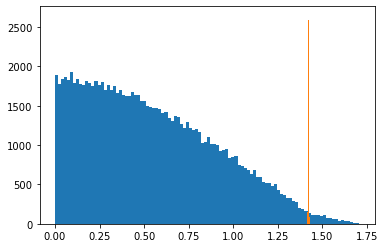

In [77]:
res=(abs(yreco.T-ytrue)).T
plt.hist(res, bins=100);
plt.hist(abs(yreco.flatten()), bins=100);
# plt.hist(ytrue, bins=100);